# **Data Understanding**

#### **Berikut adalah beberapa tahapan untuk memahami data:**


*   Data Loading
*   Univariate Exploratory Data Analysis
*   Data Preprocessing




### **Import libraries**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tabulate import tabulate

### **Data Loading**
Pada Fase ini, data akan di loading dari situs kaggel yang menyediakan dataset Data online untuk buku-buku dari Amazon beserta peringkat pengguna dan pengguna yang membelinya, terdapat 3 file dataset di dalam folder yaitu Books, Ratings, dan Users yang akan digunakan untuk proses pengembangan model.

In [2]:
!kaggle datasets download -d saurabhbagchi/books-dataset

Dataset URL: https://www.kaggle.com/datasets/saurabhbagchi/books-dataset
License(s): CC0-1.0
 37% 9.00M/24.6M [00:00<00:00, 77.5MB/s]
100% 24.6M/24.6M [00:00<00:00, 147MB/s] 


In [3]:
!unzip /content/books-dataset.zip

Archive:  /content/books-dataset.zip
  inflating: books_data/books.csv    
  inflating: books_data/ratings.csv  
  inflating: books_data/users.csv    


### **Load the dataset**
Baca dataset dengan menggunakan fungsi pandas.read_csv. Implementasikan kode berikut.

In [4]:
books_df = pd.read_csv("/content/books_data/books.csv", encoding='latin-1', on_bad_lines='skip', delimiter=';')
books_df.sample(5)

<ipython-input-4-798a8d910e0e>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("/content/books_data/books.csv", encoding='latin-1', on_bad_lines='skip', delimiter=';')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
182889,0812545370,Jitterbug : A Novel of Detroit (Detroit Series),Loren D. Estleman,2000,Forge Books,http://images.amazon.com/images/P/0812545370.0...,http://images.amazon.com/images/P/0812545370.0...,http://images.amazon.com/images/P/0812545370.0...
225602,0060231920,"Me, me, me, me, me: Not a novel (Charlotte Zol...",M. E Kerr,1983,Harper &amp; Row,http://images.amazon.com/images/P/0060231920.0...,http://images.amazon.com/images/P/0060231920.0...,http://images.amazon.com/images/P/0060231920.0...
125846,0375756280,Cracking the Lsat: 2001 (Cracking the Lsat),Adam Robinson,2000,Princeton Review,http://images.amazon.com/images/P/0375756280.0...,http://images.amazon.com/images/P/0375756280.0...,http://images.amazon.com/images/P/0375756280.0...
193688,0140240292,Excursions in the Real World: Memoirs,William Trevor,1995,Penguin Books,http://images.amazon.com/images/P/0140240292.0...,http://images.amazon.com/images/P/0140240292.0...,http://images.amazon.com/images/P/0140240292.0...
29114,0671024086,Mesmerized,Gayle Lynds,2002,Pocket Star,http://images.amazon.com/images/P/0671024086.0...,http://images.amazon.com/images/P/0671024086.0...,http://images.amazon.com/images/P/0671024086.0...


In [5]:
ratings_df = pd.read_csv("/content/books_data/ratings.csv", encoding='latin-1', on_bad_lines='skip', delimiter=';')
ratings_df.sample(5)


,User-ID,ISBN,Book-Rating
709668,172047,0515131229,6
475602,113904,0679444815,0
628236,152435,0440180368,8
639990,154354,0345326164,8
75168,16161,1582342768,10


In [6]:
users_df = pd.read_csv("/content/books_data/users.csv", encoding='latin-1', on_bad_lines='skip', delimiter=';')
users_df.sample(5)

,User-ID,Location,Age
256610,256611,"frederick, maryland, usa",NaN
234594,234595,"riverside, california, usa",NaN
67513,67514,"sacramento, california, usa",NaN
144019,144020,"macerata, marche, italy",NaN
195152,195153,"glasgow, lanarkshire, united kingdom",NaN


In [7]:
print('Jumlah data buku:', len(books_df.ISBN.unique()))
print('Jumlah data rating buku dari pembaca:', len(ratings_df.ISBN.unique()))
print('jumlah data pengguna:', len(users_df['User-ID'].unique()))

Jumlah data buku: 271360
Jumlah data rating buku dari pembaca: 340556
jumlah data pengguna: 278858


Berdasarkan output diatas, diperoleh informasi sebagai berikut:

Variabel books memiliki 271.360 jenis buku dan terdiri dari 8 kolom yaitu:
1. ISBN : merupakan nomor identitas unik buku.
2. Book-Title : merupakan judul buku.
3. Book-Author : merupakan nama penulis buku.
4. Year-Of-Publication : merupakan tahun publikasi buku.
5. Publisher : merupakan nama penerbit buku.
6. Image-URL-S : merupakan link URL gambar untuk ukuran small (kecil).
7. Image-URL-M : merupakan link URL gambar untuk ukuran medium (sedang).
8. Image-URL-L : merupakan link URL gambar untuk ukuran large (besar).

Variabel ratings memiliki 340.556 penilaian terhadap buku dan terdiri dari 3 kolom yaitu:
1. User-ID : merupakan kode unik untuk nama pengguna anonim yang memberikan penilaian.
2. ISBN : merupakan nomor identitas buku.
3. Book-Rating : merupakan penilaian yang diberikan kepada buku.

Variabel users memiliki 278.858 nama pengguna anonim dan terdiri dari 3 kolom yaitu:
1. User-ID : merupakan kode unik untuk nama pengguna anonim.
2. Location : merupakan lokasi tempat tinggal pengguna.
3. Age : merupakan usia pengguna.

### **Univariate Exploratory Data Analysis**

Pada Fase ini,  dilakukan analisis dan eksplorasi pada setiap variabel untuk memahami distribusi dan karakteristik individu dari variabel tersebut. Pemahaman ini nantinya akan membantu dalam menentukan pendekatan atau algoritma yang cocok diterapkan pada data. Variabel - variabel pada Book Recommendation Dataset adalah sebagai berikut:

1. books : merupakan data yang berisi informasi buku.
2. ratings : merupakan rating atau peringkat yang diberikan ke buku oleh pengguna atau pembaca
3. users : merupakan informasi pengguna termasuk informasi demografisnya.

### **1. Dataset Books**
Pertama, periksa terlebih dahulu isi dari dataset  books dan cek informasi dari dataset books menggunakan fungsi info().


In [8]:
# cek informasi dataset
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Berdasarkan output, diketahui bahwa file books.csv memiliki 271.360 entri dan terdiri dari 8 kolom yaitu ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, dan Image-URL-L. Diketahui juga bahwa kolom 'Year-Of-Publication' bertipe data object sedangkan tahun publikasi pada umumnya memiliki tipe data integer. Oleh karena itu akan dilakukan perbaikan tipe data terlebih dahulu.

ketika menjalankan kode berikut:
> **books['Year-Of-Publication'].astype('int')**

Untuk merubah tahun publikasi dari tipe data objek menjadi int muncul error sebagai berikut :


> **ValueError: invalid literal for int() with base 10: 'DK Publishing Inc'**

artinya terdapat value pada 'Year-Of-Publication' ada yang bernilai 'DK Publishing Inc'. Sepertinya ini terdapat kesalahan input, sehingga nanti akan dihapus nilai berupa teks tersebut sebelum mengubahnya ke dalam tipe data integer. Berdasarkan penelusuran, terdapat 2 nilai teks yaitu 'DK Publishing Inc' dan 'Gallimard'.




In [9]:
books_df[(books_df['Year-Of-Publication'] == 'DK Publishing Inc') | (books_df['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Jika diperhatikan pada kolom year of publication 3 buat data yang terisi data 'DK Publishing Inc' dan 'Gallimard' oleh karena itu akan di hapus value pada 'Year-Of-Publication' yang bernilai teks tersebut.

In [10]:
temp = (books_df['Year-Of-Publication'] == 'DK Publishing Inc') | (books_df['Year-Of-Publication'] == 'Gallimard')
books_df = books_df.drop(books_df[temp].index)
books_df[(books_df['Year-Of-Publication'] == 'DK Publishing Inc') | (books_df['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


setelah 3 data Year-Of-Publication' yang bernilai teks sudah di hapus berikutnya akan Mengubah tipe data pada 'Year-Of-Publication' menjadi data type int.

In [11]:
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)
print(books_df.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


Sekarang, tipe data pada 'Year-Of-Publication' sudah bertipe integer. Selanjutnya, adalah menghapus variabel yang tidak diperlukan pada proses pengembangan model. Karena nantinya pada sistem rekomendasi berbasis konten (content-based filtering) akan dibuat rekomendasi berdasarkan judul buku yang sama dengan nama penulis buku yang pernah dibaca oleh pengguna. Maka informasi seperti ukuran gambar tidak diperlukan, sehingga fitur/kolom 'Image-URL-S', 'Image-URL-M', dan 'Image-URL-L' bisa dihapus.

In [12]:
# Menghapus kolom Image-URL semua ukuran
books_df.drop(labels=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


Setelah di hapus kolom Image-URL sekarang dataset hanya tersisa 5 kolom/variabel saja. Untuk melihat berapa banyak entri dari masing - masing feature bisa di cek dibawah ini :

In [13]:
print("Jumlah nomor ISBN Buku:", len(books_df['ISBN'].unique()))
print("Jumlah judul buku:", len(books_df['Book-Title'].unique()))
print('Jumlah penulis buku:', len(books_df['Book-Author'].unique()))
print('Jumlah Tahun Publikasi:', len(books_df['Year-Of-Publication'].unique()))
print('Jumlah nama penerbit:', len(books_df['Publisher'].unique()))

Jumlah nomor ISBN Buku: 271357
Jumlah judul buku: 242132
Jumlah penulis buku: 102021
Jumlah Tahun Publikasi: 116
Jumlah nama penerbit: 16805


Berdasarkan output diatas diketahui jumlah dari masing - masing feature. Perhatikan bahwa jumlah judul buku pada dataset yaitu 242.135 sedangkan jumlah nomor ISBN buku adalah 271.357, artinya ada beberapa buku yang tidak memiliki nomor ISBN, karena satu ISBN hanya boleh dimiliki oleh satu buku saja. Untuk Kasus ini nantinya dataset akan di filter agar setiap buku dipastikan memiliki satu nomor ISBN.

Selanjutnya, Dilakukan pengecekan distribusi data untuk melihat 10 nama penulis teratas berdasarkan jumlah buku.

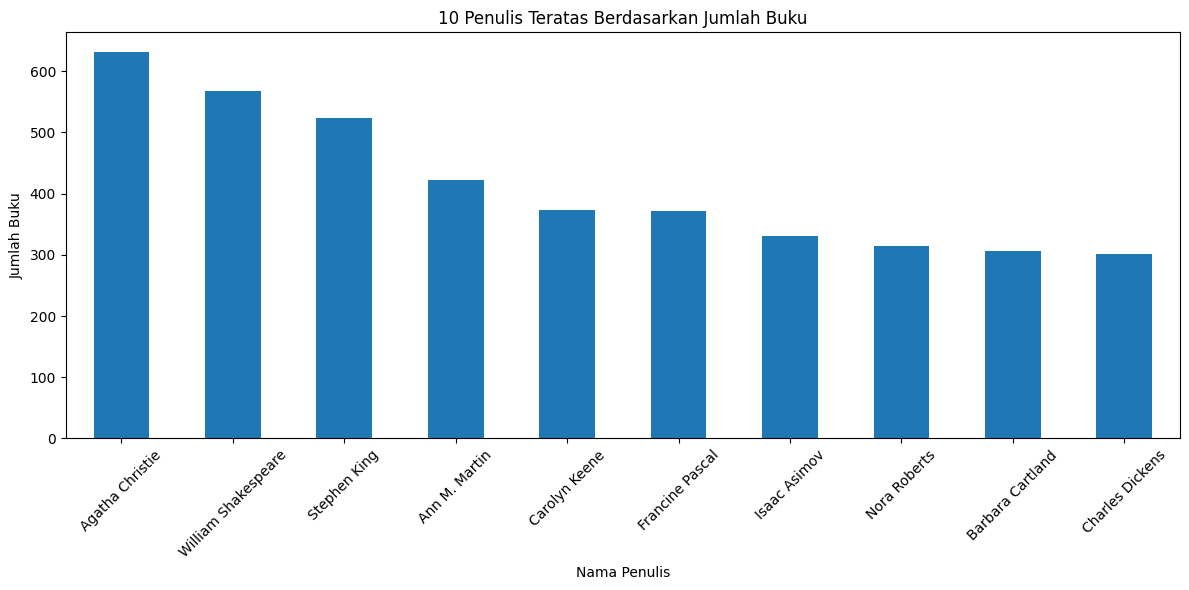

In [14]:
# Grouping'Book-Author' dan hitung jumlah buku yang ditulis oleh masing-masing penulis
author_counts = books_df.groupby('Book-Author')['Book-Title'].count()

# Urutkan penulis dalam urutan menurun
sorted_authors = author_counts.sort_values(ascending=False)

# Pilih 10 penulis teratas
top_10_authors = sorted_authors.head(10)

# Plot 10 penulis teratas dan buku yang ditulis oleh penulis kemudian dihitung menggunakan plot batang
plt.figure(figsize=(12, 6))
top_10_authors.plot(kind='bar')
plt.xlabel('Nama Penulis')
plt.ylabel('Jumlah Buku')
plt.title('10 Penulis Teratas Berdasarkan Jumlah Buku')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan informasi diatas, diketahui bahwa penulis dengan nama **Agatha Christie** menulis paling banyak buku yaitu sebanyak lebih dari **600 buku**. Dari informasi ini juga diketahui jika di dalam dataset terdapat beberapa nama penulis yang menulis buku lebih dari satu judul buku.

### **2. Dataset Ratings**

Selanjutnya, dilakukan eksplorasi pada Dataset ratings, yaitu penilaian terhadap buku dari pembaca atau pengguna. Dataset ratings ini nantinya akan digunakan untuk proses pengembangan model dengan collaborative filtering. Gunakan fungsi info() untuk melihat informasi dari variabel tersebut.

In [15]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Berdasarkan output diatas, diketahui terdapat sebanyak 1.149.780 entri dan 3 kolom yaitu User-ID yang merupakan kode unik pengguna anonim yang memberikan peringkat, ISBN yang merupakan identitas berupa nomor unik buku, dan Book-Rating yang merupakan rating buku yang diberikan oleh pembaca atau pengguna. Untuk melihat jumlah entri dari masing - masing Feature, jalankan kode berikut.

In [16]:
print('Jumlah User-ID:', len(ratings_df['User-ID'].unique()))
print('Jumlah buku berdasarkan ISBN:', len(ratings_df['ISBN'].unique()))

print('Jumlah rating buku:')
sorted_ratings = ratings_df['Book-Rating'].value_counts().sort_index()
pd.DataFrame({'Book-Rating': sorted_ratings.index, 'Jumlah': sorted_ratings.values})

Jumlah User-ID: 105283
Jumlah buku berdasarkan ISBN: 340556
Jumlah rating buku:


,Book-Rating,Jumlah
0,0,716109
1,1,1770
2,2,2759
3,3,5996
4,4,8904
5,5,50974
6,6,36924
7,7,76457
8,8,103736
9,9,67541


Berdasarkan output diatas, diketahui jika terdapat 105.283 pengguna yang memberikan rating buku, jumlah buku berdasarkan ISBN yang diberikan rating adalah 340.556 buku, dan rating yang diberikan oleh masing - masing buku memiliki niliai berkisar antara 0 sampai 10, dimana 0 adalah rating paling rendah sedangkan 10 adalah rating paling tertinggi.

Seperti terlihat pada informasi sebelumnya, dataset ratings memiliki 1.149.780 baris data, dan itu merupakan jumlah yang sangat banyak. Nantinya, dataset rating ini yang akan digunakan dalam proses pengembangan model dengan collaborative filtering. Oleh karena itu, untuk menghemat alokasi memori pada saat pelatihan model nantinya, dataset rating ini tidak akan digunakan semua. Dataset rating hanya mengambil data pertama hingga data ke 5000 saja (exclude data ke 5000). Dataset ini akan digunakan untuk pengembangan model dengan collaborative filtering karena membutuhkan data rating terhadap pengguna untuk memberikan rekomendasi judul buku kepada pengguna lainnya. Untuk memudahkan supaya tidak tertukar dengan fitur lain yang serupa, datasetnya diubah namanya menjadi **df5000_rating**.

In [17]:
df5000_rating = ratings_df[:20000]
df5000_rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
19995,3757,843222264X,7
19996,3757,8432222658,7
19997,3757,8432222666,7
19998,3757,8432222674,7


### **3. Dataset Users**

Dataset terakhir yang akan dilakukan eksplorasi adalah Dataset users. Dataset ini berisi informasi tentang pengguna anonim beserta demografinya. Gunakan fungsi info() untuk melihat informasi variabel.

In [18]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [19]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Berdasarkan informasi diatas, diketahui terdapat 278.858 entri dan terdapat 3 feature yaitu User-ID yang merupakan kode unik dari pengguna anonim, Location yang merupakan lokasi pengguna, dan Age yang merupakan usia pengguna. Diketahui juga terdapat beberapa pengguna yang usianya tidak diketahui. Data user berguna jika ingin membuat sistem rekomendasi berdasarkan demografi atau kondisi sosial pengguna. Namun, untuk studi kasus kali ini, tidak akan digunakan data users pada model. Pada pengembangan model, data yang digunakan adalah data books dan ratings.

### **Data Preprocessing**

Seperti yang sudah diketahui berdasarkan tahapan data understanding bahwa folder **books_data** Dataset terdiri dari 3 file terpisah yaitu books, ratings, dan users. Pada tahap ini, akan dilakukan proses penggabungan file menjadi satu kesatuan file agar sesuai dengan pengembangan model yang ingin dibuat.

### **Menggabungkan file dan Mengetahui Jumlah Rating**

Pada tahap ini dilakukan penggabungan file books dan ratings untuk mengetahui jumlah seluruh rating dari berbagai file tersebut. Implementasikan kode berikut.

In [20]:
# Menggabungkan dataframe ratings dengan books berdasarkan nilai ISBN
books_df = pd.merge(ratings_df, books_df, on='ISBN', how='left')
books_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996.0,Scholastic


Dataset setelah dilakukan penggabungan menjadi 7 feature dengan 1.149.780 baris data. Output diatas hanya menampilkan beberapa baris awal dan baris akhir data. Dataset inilah yang akan digunakan untuk membuat sistem rekomendasi. Selanjutnya, dilakukan perhitungan jumlah rating berdasarkan ISBN melalui kode berikut.

In [21]:
books_df[['ISBN', 'User-ID', 'Book-Rating']].groupby('ISBN').agg({'User-ID': 'unique', 'Book-Rating': 'sum'})

,User-ID,Book-Rating
ISBN,,
0330299891,"[89192, 181817]",6
0375404120,"[89192, 266865]",3
0586045007,[89192],0
9022906116,"[11676, 89192]",7
9032803328,[89192],0
...,...,...
cn113107,[107301],0
ooo7156103,[266146],7
§423350229,[85250],0


# **Data Preparation**

### **Data Preparation Untuk Model Pengembangan dengan Content Based Filtering**

Pada tahap ini di akan dilakukan beberapa teknik untuk mempersiapkan data seperti:

1. Menghilangkan missing value.
2. Menyamakan jenis buku berdasarkan ISBN.

Pada sistem rekomendasi berbasis konten (content-based filtering) yang akan dikembangkan, satu nomor ISBN mewakili satu judul buku, yang artinya nomor ISBN pada setiap buku bersifat unik. Sehingga perlu dipersiapkan terlebih dahulu datanya agar siap untuk digunakan pada proses pelatihan model.

### **1. Mengatasi Missing Value**

Setelah proses penggabungan file, langkah selanjutnya adalah dilakukan proses pengecekan apakah ada missing value atau tidak. Jalankan kode berikut.

In [22]:
# Cek missing value dengan fungsi isnull()
books_df.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,118648
Book-Author,118650
Year-Of-Publication,118648
Publisher,118650


Terdapat banyak missing value pada sebagian besar fitur. Hanya fitur User-ID, ISBN, dan Book-Rating saja yang memiliki 0 missing value. Jumlah mising value terbesar ada di fitur 'Publisher' dan 'Book-Author' yaitu sebesar 118.650. 118.650 dari total dataset yaitu 1.149.780 merupakan jumlah yang tidak terlalu signifikan atau masih tergolong kecil. Oleh karena itu, untuk kasus ini akan dilakukan proses drop atau penghapusan pada missing value ini dan buatkan dalam bentuk Dataset baru bernama **books_clean**.

In [23]:
books_clean = books_df.dropna()
books_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149774,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books


Sekarang, dataset terdiri dari 1.031.128 baris. Untuk memastikan tidak ada missing value lagi dalam data, jalankan kode berikut.

In [24]:
books_clean.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0


Sekarang, dataset sudah bersih dan bisa lanjut ke tahap berikutnya.

### **Menyamakan jenis buku berdasarkan ISBN**

Sebelum masuk tahap pemodelan, diperlukan proses menyamakan judul buku berdasarkan ISBN-nya. Jika terdapat nomor ISBN yang sama pada lebih dari satu judul buku dapat menyebabkan bias pada data. Oleh karena itu harus dipastikan bahwa hanya terdapat satu nomor ISBN pada satu judul buku saja.

mengecek berapa jumlah nomor ISBN Unik

In [25]:
len(books_clean['ISBN'].unique())

270144

mengecek berapa jumlah nomor Judul Buku yang unik

In [26]:
len(books_clean['Book-Title'].unique())

241065

Berdasarkan informasi diatas, diketahui bahwa jumlah nomor ISBN dengan jumlah judul buku tidak sama, artinya terdapat nomor ISBN yang sama pada lebih dari satu judul buku. Hal tersebut harus diatasi dengan mengubah datasetnya menjadi data unik sehingga nantinya siap dimasukkan ke dalam proses pemodelan. Oleh karena itu, diperlukan proses membuang data duplikat pada kolom 'ISBN' dan simpan ke dalam variabel baru bernama **'prep_book'**. implementasikan kode berikut.

In [27]:
prep_book = books_clean.drop_duplicates('ISBN')
prep_book

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149701,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995.0,Random House Value Pub
1149747,276688,1575660792,7,Gray Matter,Shirley Kennett,1996.0,Kensington Publishing Corporation
1149757,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997.0,Apple
1149770,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997.0,Vintage Books USA


Setelah itu, kita lakukan proses pengecekan kembali jumlah data dari ISBN, judul buku (Book-Title), dan nama penulis buku (Book-Author). Dilakukan proses konversi data series menjadi list dengan fungsi tolist() dari library. Implementasikan kode berikut.

In [28]:
# konversi data series 'ISBN' menjadi bentuk list
isbn_id = prep_book['ISBN'].tolist()

# konversi data series 'Book-Title' menjadi bentuk list
book_title = prep_book['Book-Title'].tolist()

# konversi data series 'Book-Author' menjadi bentuk list
book_author = prep_book['Book-Author'].tolist()

# konversi data series 'Year-Of-Publication' menjadi bentuk list
year_of_publication = prep_book['Year-Of-Publication'].tolist()

# konversi data series 'Publisher' menjadi bentuk list
publisher = prep_book['Publisher'].tolist()

print(len(isbn_id))
print(len(book_title))
print(len(book_author))
print(len(year_of_publication))
print(len(publisher))

270144
270144
270144
270144
270144


Berdasarkan output diatas, diketahui bahwa sekarang jumlah data dari ISBN, judul buku, nama penulis buku, tahun publikasi dan nama penerbit sudah sama atau sudah merupakan data unik dan dataset hanya tersisa 270.144 baris data setelah melewati proses penghilangan duplikasi nilai. Tahap berikutnya yaitu pembuatan dictionary untuk menentukan pasangan key-value pada data isbn_id, book_title, book_author, year_of_publication, dan publihser yang sudah disiapkan sebelumnya untuk proses pengembangan model sistem rekomendasi berbasis konten (content-based filtering).

In [29]:
# Membuat dictionary untuk data ‘isbn_id’, ‘book_title’, ‘book_author’, 'year_of_publication', dan 'publisher'
books_ok = pd.DataFrame({
    'isbn': isbn_id,
    'book_title': book_title,
    'book_author': book_author,
    'year_of_publication': year_of_publication,
    'publisher': publisher

})

books_ok

,isbn,book_title,book_author,year_of_publication,publisher
0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,0155061224,Rites of Passage,Judith Rae,2001.0,Heinle
2,0446520802,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,052165615X,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,0521795028,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...
270139,0517145553,Mostly Harmless,Douglas Adams,1995.0,Random House Value Pub
270140,1575660792,Gray Matter,Shirley Kennett,1996.0,Kensington Publishing Corporation
270141,0590907301,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997.0,Apple
270142,0679752714,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997.0,Vintage Books USA


Karena dataset yang dimiliki terlalu banyak dan secara otomatis alokasi memori yang digunakan nantinya akan sangat banyak untuk memproses seluruh data pada pengembangan model, maka pada proyek ini hanya akan mengambil data pertama hingga data ke 20.000 (exlude data ke 20.000).

In [30]:
books_ok = books_ok[:20000]
books_ok

,isbn,book_title,book_author,year_of_publication,publisher
0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,0155061224,Rites of Passage,Judith Rae,2001.0,Heinle
2,0446520802,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,052165615X,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,0521795028,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...
19995,0439160200,"All Chalked Up (Powerpuff Girls Chapter Book, 2)",Amy Keating Rogers,2000.0,Volo Paperbacks
19996,0439160219,"Cartoon Crazy (Powerpuff Girls Chapter Book, 3)",E. T. Mooney,2000.0,Scholastic
19997,0439172187,"Sprite's Secret (Pixie Tricks, 1)",Tracey West,2000.0,Scholastic
19998,059043411X,Vampires Don't Wear Polka Dots (Adventures of ...,Debbie Dadey,1997.0,Scholastic


Inilah data yang akan digunakan pada proses pengembangan model dengan teknik content based filtering.

### **Data Preparation Untuk Model Pengembangan dengan Collaborative Filtering**

Pada model pengembangan dengan collaborative filtering, data nantinya akan dibagi menjadi data training dan data validasi dalam proses pelatihan model, sebelum di bagi menjadi data training dan data validasi, data harus dipersiapkan terlebih dahulu. Data rating harus diubah ke dalam bentuk matriks numerik agar nantinya mempermudah proses pelatihan model sehingga model menjadi mudah mengenali/mempelajari data tersebut. Sebelum itu dilakukan, Pada tahap ini di dilakukan beberapa teknik untuk mempersiapkan data seperti menyandikan (encode) fitur 'User-ID' dan 'ISBN' ke dalam indeks integer, memetakan 'User-ID' dan 'ISBN'ke dataframe yang berkaitan, dan yang terakhir mengecek beberapa hal dalam data seperti jumlah pengguna, jumlah buku, kemudian mengubah nilai rating menjadi float agar bisa digunakan pada proses pelatihan model.

Pertama, dilakukan proses menyandikan (encode) fitur 'User-ID' dan 'ISBN' ke dalam indeks integer. Sebagai Berikut :

In [31]:
# mengubah User-ID menjadi list tanpa nilai yang sama
user_ids = df5000_rating ['User-ID'].unique().tolist()
print('list userID: ', user_ids)

# melakukan encoding User-ID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID: ', user_to_user_encoded)

# melakukan proses encoding angka ke User-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 2

Selanjutnya, lakukan hal yang sama pada 'ISBN'.

In [32]:
# mengubah ISBN menjadi list tanpa nilai yang sama
isbn_id = df5000_rating['ISBN'].unique().tolist()
print('list ISBN_Id: ', isbn_id)

# melakukan encoding ISBN
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_id)}
print('encoded ISBN_Id: ', isbn_to_isbn_encoded)

# melakukan proses encoding angka ke ISBN
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_id)}
print('encoded angka ke ISBN_Id: ', isbn_encoded_to_isbn)

list ISBN_Id:  ['034545104X', '0155061224', '0446520802', '052165615X', '0521795028', '2080674722', '3257224281', '0600570967', '038550120X', '342310538', '0425115801', '0449006522', '0553561618', '055356451X', '0786013990', '0786014512', '0060517794', '0451192001', '0609801279', '0671537458', '0679776818', '0943066433', '1570231028', '1885408226', '0747558167', '3442437407', '033390804X', '3596218098', '0684867621', '0451166892', '8440682697', '034544003X', '0380000059', '0380711524', '0451167317', '0451454952', '0843920262', '3404122879', '3404182928', '3404611306', '342662429', '3426690179', '3442424216', '3442425573', '3453092007', '3453157745', '3453176944', '3453185137', '3453185323', '3453213025', '3453877241', '3492226604', '3517017442', '3596125006', 'B0000BLD7X', 'N3453124715', '9029716894', '9057868059', '0140279091', '0553572369', '0571058086', '3499230933', '3596151465', '0099543818', '3404147723', '3423111321', '3442136644', '3492232000', '8434811634', '8484330478', '8484

Berikutnya, petakan User-ID dan ISBN ke dataframe yang berkaitan.

Menonaktifkan peringatan SettingWithCopyWarning

In [33]:
pd.options.mode.chained_assignment = None

Mapping User-ID ke dataframe user

In [34]:
df5000_rating['user'] = df5000_rating['User-ID'].map(user_to_user_encoded)

Mapping ISBN ke dataframe judul buku

In [35]:
df5000_rating['book_title'] = df5000_rating['ISBN'].map(isbn_to_isbn_encoded)

Cek beberapa hal dalam data seperti jumlah user, jumlah judul buku, dan mengubah nilai rating menjadi float.

In [36]:
# mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# mendapatkan jumlah judul buku
num_book_title = len(isbn_to_isbn_encoded)
print(num_book_title)

# mengubah rating menjadi nilai float
df5000_rating['Book-Rating'] = df5000_rating['Book-Rating'].values.astype(np.float32)

# nilai minimum rating
min_rating = min(df5000_rating['Book-Rating'])

# nilai maksimum rating
max_rating = max(df5000_rating['Book-Rating'])

print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book_title, min_rating, max_rating
))

2180
17178
Number of User: 2180, Number of Book: 17178, Min Rating: 0.0, Max Rating: 10.0


Tahap persiapan data sudah selesai. Data sudah siap untuk digunakan nantinya pada proses pembagian menjadi data training dan data validasi pada proses pengembangan model dengan collaborative filtering.

# **Modeling**

## **Model Development dengan Content Based Filtering**

Pada tahap ini, akan dikembangkan model dengan teknik Content Based Filtering. Content Based Filtering adalah salah satu pendekatan dalam sistem rekomendasi yang menggunakan informasi atau "konten" dari item atau pengguna untuk membuat rekomendasi. Ide dasarnya adalah mencocokkan preferensi pengguna dengan karakteristik atau konten dari item yang telah dilihat atau disukai oleh pengguna sebelumnya. Misalkan, jika seorang pengguna menyukai atau pernah membeli buku dengan judul "Introduction to Machine Learning" dan buku tersebut memiliki fitur berupa nama penulis buku yaitu "Alex Smola", maka sistem akan mencari buku lain dengan fitur serupa dan merekomendasikannya dalam bentuk top-N recommendation kepada pengguna tersebut.

Pada proses pengembangan model dilakukan pencarian representasi fitur penting dari setiap judul buku dengan TF-IDF (Term Frequency - Inverse Document Frequency) Vectorizer. TF-IDF vectorizer adalah alat yang digunakan untuk mengonversi dokumen teks menjadi representasi vektor berdasarkan nilai TF-ID setiap kata dalam dokumen tersebut. TF (Term Frequency) mengukur seberapa sering suatu kata muncul dalam suatu dokumen. Sedangkan, IDF mengukur seberapa unik atau jarang suatu kata muncul dalam seluruh koleksi dokumen. Vektor ini nanti digunakan untuk melakukan proses pencarian representasi fitur penting dari setiap judul buku berdasarkan nama penulis buku pada model yang dikembangkan dengan teknik Content Based Filtering. Pada proyek ini digunakan fungsi tfidfvectorizer() dari library Sklearn.

Sementara itu, untuk menghitung derajat kesamaan (similarity degree) antar judul buku digunakan teknik cosine similarity. Metode ini digunakan untuk mengukur sejauh mana kesamaan antar dua vektor dalam ruang berdimensi banyak. Cosine similarity mengukur sudut kosinus antara dua vektor, dan semakin kecil sudutnya, semakin besar kesamaan antara vektor - vektor tersebut. Pada proyek ini digunakan fungsi cosine_similarity dari library Sklearn.

### **TF-IDF Vectorizer**

Import fungsi tfidfvectorizer() dari libray Sklearn.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data book_author
tf.fit(books_ok['book_author'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['aa', 'aardema', 'aaron', ..., 'â¼ffel', 'â¼nter', 'â¼skind'],
      dtype=object)

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks.

In [38]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(books_ok['book_author'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(20000, 8829)

Berdasarkan output, matrik memiliki ukuran (20000, 8829). Nilai 20000 merupakan ukuran data dan 8829 merupakan matriks nama penulis buku. Untuk menghasilkan vektor tf-idf dalam bentuk matriks, gunakan fungsi todense().

In [39]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Selanjutnya, mari lihat matriks tf-idf untuk beberapa judul buku dan nama penulis buku dalam bentuk dataframe, dimana kolom diisi dengan nama penulis buku sedangkan baris diisi dengan judul buku.

In [40]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=books_ok.book_title
).sample(15, axis=1).sample(10, axis=0)

,gilmour,quevedo,elliott,dexter,joseph,linedecker,bull,mccammon,gourevitch,eager,gischler,sheryl,duncan,bezzant,vasilos
book_title,,,,,,,,,,,,,,,
Miracle at St. Anna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"PS, I Love You",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rhinoceros Success,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Calvin and Hobbes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pride and Prejudice (Puffin Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BY LOVE DIVIDED,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Cider House Rules,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Halloween Friends (Mini Shaped Books),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Nothing in This Book Is True, but It's Exactly How Things Are: The Esoteric Meaning of the Monuments on Mars",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Output dari matriks tf-idf berhasil mengidentifikasi representasi fitur penting dari setiap kategori judul buku dengan fungsi tfidfvectorizer. Pada Kasus ini dataset hanya ditampilkan berupa sampel data sehingga tidak terlihat keseluruhan matriks. Dari 20000 data hanya dipilih sampel data acak yang terdiri dari 10 judul buku pada baris vertikal dan 15 nama penulis buku pada baris horizontal.

### **Cosine Similarity**

Berikutnya mengidentifikasi korelasi antara judul buku dengan penulis buku. Sekarang, akan dilakukan proses menghitung derajat kesamaan (similarity degree) antar judul buku dengan teknik cosine similarity.

In [41]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine = cosine_similarity(tfidf_matrix)
cosine

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Pada tahap ini, dilakukan proses perhitungan cosine similarity dataframe tfidf_matrix yang diperoleh pada tahapan sebelumnya. Dengan fungsi cosine_similarity dari library sklearn, didapat nilai kesamaan (similarity) antar judul buku. Kode diatas menghasilkan keluaran berupa matriks kesamaan dalam bentuk array.

Selanjutnya, mari lihat matriks kesamaan setiap judul buku dengan menampilkan nama judul buku dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis = 0).

In [42]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama judul buku
cosine_df = pd.DataFrame(cosine, index=books_ok['book_title'], columns=books_ok['book_title'])
print('Shape:', cosine_df.shape)

# Melihat similarity matrix pada setiap judul buku
cosine_df.sample(5, axis=1).sample(10, axis=0)

Shape: (20000, 20000)


book_title,Old Man and the Sea,Respect for Acting,"Marriage Protection Program (Cameron Utah) (Silhouette Intimate Moments, 951)",Une porte sur l'Ã?Â©tÃ?Â©,North Carolina : A Guide to Backcountry Travel &amp; Adventure
book_title,,,,,
Art Objects: Essays on Ecstasy and Effrontery,0.0,0.0,0.000000,0.0,0.000000
Kids With Character: Preparing Children for a Lifetime of Choices,0.0,0.0,0.449368,0.0,0.000000
I Had a Dollar in Hawaii,0.0,0.0,0.000000,0.0,0.000000
Finding Forrester: A Novel,0.0,0.0,0.000000,0.0,0.224528
Wish You Well,0.0,0.0,0.000000,0.0,0.000000
Im Netz der Spinnen. Videokill.,0.0,0.0,0.000000,0.0,0.000000
When Things Fall Apart : Heart Advice for Difficult Times (Shambhala Classics),0.0,0.0,0.000000,0.0,0.000000
The Girls' Guide to Hunting and Fishing,0.0,0.0,0.000000,0.0,0.000000
Keeping Faith (A Little secret),0.0,0.0,0.000000,0.0,0.000000


Dengan cosine similarity, berhasil mengidentifikasi kesamaan antara satu judul buku dengan judul buku lainnya. Shape (20000, 20000) merupakan ukuran matriks similarity dari data. Berdasarkan data yang ada, matriks diatas sebenarnya berukuran 20000 judul buku x 20000 judul buku (masing - masing dalam sumbu X dan Y). Artinya, telah berhasil mengidentifikasi tingkat kesamaan pada 20000 judul buku. Tapi disini tidak bisa menampilkan semua datanya. Oleh karena itu, hanya dipilih 10 judul buku pada baris vertikal dan 5 judul buku pada baris horizontal. Dengan data kesamaan (similarity) judul buku yang diperoleh sebelumnya, akan dilakukan proses rekomendasi daftar judul buku yang mirip dengan judul buku yang sebelumnya pernah dibeli atau dibaca oleh pengguna.

### **Memperoleh Informasi Rekomendasi**

Pada tahap ini, akan dibuatkan sebuah fungsi bernama Rekomendasi_buku dengan beberapa parameter sebagai berikut:

1. book_title : nama judul buku (index kemiripan dataframe).
2. similarity_data : Dataframe mengenai similarity yang telah didefinisikan sebelumnya.
3. items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah 'book_title' dan 'book_author'.
4. k : Jumlah top-N recommendation yang diberikan oleh sistem rekomendasi. Secara default, k bernilai 5.

Sebelum menulis kode, perlu diingat bahwa definisi dari sistem rekomendasi yang menyatakan bahwa keluaran sistem adalah berupa top-N recommendation. Oleh karena itu, perlu diberikan sejumlah rekomendasi judul buku pada pengguna yang diatur pada parameter k.

In [43]:
def rekomendasi_buku(book_title, similarity_data=cosine_df, items=books_ok[['book_title', 'book_author']], k=5):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,book_title].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop book_title agar nama buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(book_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

proses pengambilan sejumlah nilai k tertinggi dari similarity data (dalam kasus ini: dataframe **cosine_df**). Selanjutnya, mengambil data dari bobot (tingkat kesamaan) tertinggi ke terendah. Data ini dimasukkan ke dalam variabel closest. Berikutnya, perlu dihapus book_title yang dicari agar tidak muncul dalam daftar rekomendasi. Dalam kasus ini, akan dicari judul buku yang mirip dengan judul buku yang nanti di input dalam book_title, sehingga perlu drop book_title agar tidak muncul dalam daftar rekomendasi yang diberikan nanti.

Gunakan fungsi **rekomendasi_buku** tersebut untuk membuat rekomendasi 10 buku teratas yang direkomendasikan oleh sistem.

In [44]:
book_title_test = "A Caribbean Mystery" # contoh judul buku

books_ok[books_ok.book_title.eq(book_title_test)]

,isbn,book_title,book_author,year_of_publication,publisher
10189,0671555235,A Caribbean Mystery,Agatha Christie,1984.0,Pocket


Perhatikan, bahwa judul buku **'A Caribbean Mystery'** ditulis oleh **'Agatha Christie'**. Sekarang, gunakan fungsi buku_rekomendasi untuk mendapatkan rekomendasi berdasarkan judul buku tersebut.

In [45]:
# Mendapatkan rekomendasi judul buku yang mirip
rekomendasi_buku(book_title_test)

,book_title,book_author
0,Postern of Fate (Christie's Good to the Last D...,Agatha Christie
1,Masterpieces of murder,Agatha Christie
2,ABC MURDERS,Agatha Christie
3,The Witness for the Prosecution and Other Stories,Agatha Christie
4,Endless Night,Agatha Christie


Berdasarkan output diatas, sistem berhasil merekomendasikan 5 judul buku teratas dengan kategori nama penulis (book_author) yaitu **'Agatha Christie'**.

### **Model Development dengan Collaborative Filtering**

Pada proses pengembangan model kali ini, akan diterapkan teknik collaborative filtering untuk membuat sistem rekomendasi. Teknik ini membutuhkan data rating dari pengguna atau pembaca. Collaborative filtering adalah salah satu metode dalam sistem rekomendasi yang memprediksi preferensi atau minat pengguna terhadap item berdasarkan informasi dari pengguna lain (kolaborasi). Ide dasar dibalik collaborative filtering adalah bahwa pengguna yang memiliki preferensi serupa dalam masa lalu cenderung memiliki preferensi serupa untuk item di masa depan. Pada kasus ini akan dibuat model collaborative filtering berdasarkan kesamaan antar pengguna (User-Based Collaborative Filtering).

Pengembangan model dengan Collaborative filtering pada kasus ini akan menghasilkan rekomendasi sejumlah judul buku yang sesuai dengan preferensi pengguna berdasarkan rating yang telah diberikan sebelumnya. Dari data rating pengguna, akan diidentifikasi nama - nama judul buku yang mirip dan belum pernah dibaca atau dibeli oleh pengguna untuk direkomendasikan.

Setelah tahapan persiapan data untuk pengembangan model ini sudah dilakukan di bagian data preparation sebelumnya, langkah selanjutnya dilakukan pembagian data untuk data training dan data validasi, kemudian dilanjutkan dengan proses training model. Pada proses training, model menghitung skor kecocokan antara pengguna dan judul buku dengan teknik embedding. Pertama, dilakukan proses embedding terhadap data pengguna dan judul buku. Selanjutnya, lakukan operasi perkalian dot product antara embedding pengguna dan judul buku. Selain itu, ditambahkan bias untuk setiap pengguna dan judul buku. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid. Model dibuatkan class RecommenderNet dengan keras Model class. Kode class RecommenderNet ini terinspirasi dari tutorial dalam situs keras dengan beberapa adaptasi layer yang menyesuaikan dengan kasus yang sedang dikerjakan. Model akan menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan Root Mean Squared Error (RMSE) sebagai metrik evaluasi.

### **Membagi data untuk Training dan Validasi**

Sebelum dilakukan pembagian data menjadi training dan validasi, data terlebih dahulu diacak agar distribusinya menjadi random.

In [46]:
# mengacak dataset
df5000_rating = df5000_rating.sample(frac=1, random_state=42)
df5000_rating

,User-ID,ISBN,Book-Rating,user,book_title
10650,446,0061000280,10.0,1005,9861
2041,277478,0340565276,8.0,273,1978
8668,278418,1569751544,3.0,678,8223
1114,277195,0394726413,0.0,173,1098
13902,1928,0373196903,0.0,1511,12430
...,...,...,...,...,...
11284,651,1888451084,7.0,1071,10381
11964,929,0345331605,7.0,1163,10917
5390,278418,0373121962,0.0,678,5066
860,277087,8472230082,5.0,139,850


Selanjutnya, dilakukan proses pembagian data menjadi data train dan validasi dengan komposisi 80:20. Namun sebelumnya, perlu dipetakan (mapping) data user dan judul buku menjadi satu value terlebih dahulu. Kemudian, dibuat rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training.

In [47]:
# membuat variabel x untuk mencocokkan data user dan judul buku menjadi satu value
x = df5000_rating[['user', 'book_title']].values

# membuat variabel y untuk membuat rating dari hasil
y = df5000_rating['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# membagi menjadi 90% data train dan 10% data validasi

train_indices = int(0.8 * df5000_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 1005  9861]
 [  273  1978]
 [  678  8223]
 ...
 [  678  5066]
 [  139   850]
 [ 1706 13939]] [1.  0.8 0.3 ... 0.  0.5 0. ]


Sampai proses ini, data sudah siap untuk dimasukkan ke dalam pengembangan model dengan collaborative filtering.

### **Proses training**

Pada proses training model, model akan menghitung skor kecocokan antara pengguna dan judul buku dengan teknik embedding. Pertama, dilakukan proses embedding terhadap data user dan book_title. Selanjutnya, lakukan operasi perkalian dot product antara embedding user dan book_title. Selain itu, juga dapat menambahkan bias untuk setiap user dan book_title. Skor kecocokan ditetapkan dalam skala [0, 1] dengan fungsi aktivasi sigmoid.

Di sini, Model dibuatkan class RecommenderNet dengan keras Model class. Kode class RecommenderNet ini terinspirasi dari tutorial dalam situs keras dengan beberapa adaptasi layer yang menyesuaikan dengan kasus yang sedang dikerjakan.

In [50]:
class RecommenderNet(tf.keras.Model):

    # inisialisasi fungsi
    def __init__(self, num_users, num_book_title, embedding_size, dropout_rate=0.2, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_book_title = num_book_title
        self.embedding_size = embedding_size
        self.dropout_rate = dropout_rate

        self.user_embedding = layers.Embedding( # layer embedding user
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias

        self.book_title_embedding = layers.Embedding( # layer embedding book_title
            num_book_title,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.book_title_bias = layers.Embedding(num_book_title, 1) # layer embedding book_title

        self.dropout = layers.Dropout(rate=dropout_rate)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0]) # memanggil layer embedding 1
        user_vector = self.dropout(user_vector)
        user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2

        book_title_vector = self.book_title_embedding(inputs[:, 1]) # memanggil layer embedding 3
        book_title_vector = self.dropout(book_title_vector)
        book_title_bias = self.book_title_bias(inputs[:, 1]) # memanggil layer embedding 4

        dot_user_book_title = tf.tensordot(user_vector, book_title_vector, 2) # perkalian dot product

        x = dot_user_book_title + user_bias + book_title_bias

        return tf.nn.sigmoid(x) # activation sigmoid

Selanjutnya, lakukan proses compile terhadap model.

In [51]:
model = RecommenderNet(num_users, num_book_title, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=1e-4),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation.

In [52]:
# memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - loss: 0.6836 - root_mean_squared_error: 0.4357 - val_loss: 0.6666 - val_root_mean_squared_error: 0.4248
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.6540 - root_mean_squared_error: 0.4189 - val_loss: 0.6475 - val_root_mean_squared_error: 0.4137
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 0.6181 - root_mean_squared_error: 0.3969 - val_loss: 0.6315 - val_root_mean_squared_error: 0.4043
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 0.5793 - root_mean_squared_error: 0.3741 - val_loss: 0.6184 - val_root_mean_squared_error: 0.3968
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.5464 - root_mean_squared_error: 0.3564 - val_loss: 0.6077 - val_root_mean_squared_error: 0.3907
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.5355 - root_mean_squared_error: 0.3534 - val_loss: 0.5983 - val_root_mean_squared_error: 0.3855
Epoch 7/50
1000/1000 ━━━━━━━

Berdasarkan hasil proses training model, didapat hasil yang cukup memuaskan dan model konvergen pada epochs sekitar 50. Dari proses ini, diperoleh nilai Root Mean Squared Error (RMSE) sebesar sekitar 0.2953 dan RMSE pada data validasi sebesar 0.3385. Nilai ini cukup bagus untuk sistem rekomendasi. Untuk mengetahui hasil dari pengembangan model, langkah selanjutnya adalah mendapatkan rekomendasi judul buku berdasarkan model yang dikembangan.

### **Mendapatkan Rekomendasi Judul Buku**

Untuk mendapatkan rekomendasi judul buku, pertama diambil sampel user secara acak dan definisikan variabel **book_not_read** yang merupakan daftar buku yang belum pernah dibaca atau dibeli oleh pengguna. variabel **book_not_read** inilah yang akan menjadi judul buku yang direkomendasikan oleh sistem.

Variabel **book_bot_visit** diperoleh dengan menggunakan operator bitwise (~) pada variabel **book_read_by_user**.

In [54]:
book_colab = books_ok

# mengambil sampel user
user_id = df5000_rating['User-ID'].sample(1).iloc[0]
book_read_by_user = df5000_rating[df5000_rating['User-ID'] == user_id]

# membuat variabel book_not_readed
book_not_read = book_colab[~book_colab['isbn'].isin(book_read_by_user['ISBN'].values)]['isbn']
book_not_read = list(
    set(book_not_read)
    .intersection(set(isbn_to_isbn_encoded.keys()))
)

book_not_read = [[isbn_to_isbn_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

Selanjutnya, untuk memperoleh rekomendasi judul buku, gunakan fungsi model.predict() dari library Keras.

In [55]:
ratings_model = model.predict(user_book_array).flatten()

top_ratings_indices = ratings_model.argsort()[-10:][::-1]

recommended_book_ids = [
    isbn_encoded_to_isbn.get(book_not_read[x][0]) for x in top_ratings_indices
]

top_book_user = (
    book_read_by_user.sort_values(
        by='Book-Rating',
        ascending=False
    )
    .head(10)['ISBN'].values
)

book_df_rows = book_colab[book_colab['isbn'].isin(top_book_user)]

# Menampilkan rekomendasi buku dalam bentuk DataFrame
book_colab_rows_data = []
for row in book_df_rows.itertuples():
    book_colab_rows_data.append([row.book_title, row.book_author])

recommended_book = book_colab[book_colab['isbn'].isin(recommended_book_ids)]

recommended_book_data = []
for row in recommended_book.itertuples():
    recommended_book_data.append([row.book_title, row.book_author])

# Membuat DataFrame untuk output
output_columns = ['Book Title', 'Book Author']
df_book_read_by_user = pd.DataFrame(book_colab_rows_data, columns=output_columns)
df_recommended_books = pd.DataFrame(recommended_book_data, columns=output_columns)

# Menampilkan hasil rekomendasi dalam bentuk DataFrame
print("Showing recommendation for users: {}".format(user_id))
print("===" * 9)
print("Book with high ratings from user")
print("----" * 8)
print(df_book_read_by_user)
print("----" * 8)
print("Top 10 books recommendation")
print("----" * 8)
df_recommended_books

455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Showing recommendation for users: 32
Book with high ratings from user
--------------------------------
                         Book Title         Book Author
0                    Pigs in Heaven  Barbara Kingsolver
1  Miss Zukas and the Raven's Dance          Jo Dereske
2               Pride and Prejudice         Jane Austen
--------------------------------
Top 10 books recommendation
--------------------------------


,Book Title,Book Author
0,The Watsons Go to Birmingham - 1963 (Yearling ...,CHRISTOPHER PAUL CURTIS
1,The Da Vinci Code,Dan Brown
2,Dreaming Numbers: A Counting Book (Toddler Books),Eugenie Fernandes
3,Rebecca,Daphne Du Maurier
4,The Jewel That Was Ours,Colin Dexter
5,Prodigal Summer: A Novel,Barbara Kingsolver
6,The Rocky Mountain Wonderland,Enos A. Mills
7,The Method of Zen,EUGEN HERRIGEL
8,Children of God (Ballantine Readers Circle),Mary Doria Russell
9,Wicca: A Guide for the Solitary Practitioner,Scott Cunningham


Berdasarkan output diatas, telah berhasil dibuat rekomendasi kepada user. Hasil di atas adalah rekomendasi untuk user dengan id 32. Dari output tersebut, dapat dibandingkan antara 'Book with high ratings from user' dan 'Top 10 books recomendation' untuk user.

Beberapa judul buku rekomendasi menyediakan nama penulis bukunya juga yang sesuai dengan rating user. Diperoleh 10 top rekomendasi buku yang disertai juga dengan nama penulisnya untuk user tersebut serta terdapat 1 judul buku yang merupakan buku dengan rating tertinggi dari user.

## **Evaluation**

### **Evaluasi Model dengan Content Based Filtering**

Metrik yang digunakan untuk evaluasi model dengan content based filtering di kasus kali ini adalah Precision, Recall, dan F1-Score. Metrik ini adalah metrik yang umum digunakan untuk mengukur kinerja model. Precision merupakan rasio item yang revelan yang dihasilkan oleh model terhadap total item yang dihasilkan. Recall merupakan rasio item relevan yang dihasilkan oleh model terhadap total item yang seharusnya direkomendasikan. Sedangkan, F1 Score adalah gabungan dari Precision dan Recall, memberikan nilai tunggal yang mengukur keseimbangan antara keduanya.

Sebelum menghitung nilai evaluasi metrik menggunakan precision, recall dan f1 score, diperlukan sebuah data yang terdiri dari label sebenarnya dan digunakan untuk menilai hasil prediksi model, data ini disebut sebagai data ground truth. Data ground truth pada proyek ini dibuat menggunakan hasil derajat kesamaan yang dihitung menggunakan teknik cosine similarity, dimana setiap baris dan kolom mewakili judul buku, dan nilai di setiap sel pada dataframe mewakili label. Angka 1 untuk similar, dan angka 0 untuk tidak similar. Perlu ditetapkan juga sebuah nilai ambang batas atau threshold untuk memutuskan apakah nilai similarity antara dua item harus dianggap 1 (similar) atau 0 (tidak similar).

In [58]:
# Menentukan threshold untuk mengkategorikan similarity sebagai 1 atau 0
threshold = 0.5

# Membuat ground truth data dengan asumsi threshold
ground_truth = np.where(cosine >= threshold, 1, 0)

# Menampilkan beberapa nilai pada ground truth matrix
ground_truth_df = pd.DataFrame(ground_truth, index=books_ok['book_title'], columns=books_ok['book_title']).sample(5, axis=1).sample(10, axis=0)

Pada kode diatas, ditetapkan nilai ambang batas atau threshold sebesar 0.5. Nilai threshold ini disesuaikan dengan kebutuhan dan karakteristik setelah melihat hasil rekomendasi sebelumnya. Lalu dibuatkan matriks ground truth menggunakan fungsi np.where() dari NumPy. Matriks ini akan memiliki nilai 1 di posisi di mana nilai cosine similarity antara dua item lebih besar atau sama dengan nilai threshold yang ditetapkan, dan nilai 0 di posisi di mana nilai similarity di bawah threshold. Kemudian, setelah matriks dibuat, hasilnya disajikan dalam bentuk dataframe. Baris dan kolom Dataframe ground truth ini diindeks menggunakan judul buku dari data. Berikut tampilan dari dataframe ground truth.

In [59]:
ground_truth_df

book_title,"Gabriel'S Heart (March Madness) (Harlequin Historical, No 405)",The Practice of the Presence of God,Doctors,So You Want to Be a Wizard: The First Book in the Young Wizards Series,Charlie Brown Dictionary Volume 1
book_title,,,,,
Life and Death in Shanghai,0,0,0,0,0
Confucio nel computer: Memoria accidentale del futuro,0,0,0,0,0
The Fifth Sacred Thing,0,0,0,0,0
The 37th Hour,0,0,0,0,0
Blue Moon (Anita Blake Vampire Hunter),0,0,0,0,0
Firebrand,0,0,0,0,0
"The Age of Manipulation: The Con in Confidence, the Sin in Sincere",0,0,0,0,0
Who Speaks for Wolf: A Native American Learning Story,0,0,0,0,0
The Florabama Ladies Auxiliary and Sewing Circle,0,0,0,0,0


Setelah dibuatkan matriks ground truth yang berisi label sebenarnya dari hasil cosine similarity. Selanjutnya, dilakukan proses perhitungan evaluasi model dengan metrik precision, recall, dan f1 score. Pertama, mengimport fungsi precision_recall_fscore_support dari library Sklearn yang digunakan untuk menghitung precision, recall dan f1 score. Lalu karena keterbatasan alokasi memori pada perangkat, data hanya diambil sekitar 10000 sampel dari cosine similarity dan ground truth matriks. Hal ini dilakukan untuk mempercepat proses perhitungan, terutama karena ukuran matriks yang cukup besar. Kemudian, matriks cosine similarity dan ground truth dikonversi menjadi array satu dimensi agar mempermudah perbandingan dan perhitungan metrik evaluasi.

Digunakan juga threshold untuk mengkategorikan nilai cosine similarity sebagai 1 atau 0. Jika nilai similarity di atas atau sama dengan threshold, dianggap sebagai 1 (positif), dan jika di bawah threshold, dianggap sebagai 0 (negatif). Hasilnya disimpan dalam array predictions. Terakhir, digunakan fungsi precision_recall_fscore_support untuk menghitung precision, recall, dan f1 score. Parameter average='binary' digunakan karena sedang mengukur kinerja dalam konteks klasifikasi biner (1 atau 0). Parameter 'zero_division=1' digunakan untuk menghindari pembagian dengan nol jika ada kelas yang tidak terdapat di prediksi. Implementasi kode berikut:

In [60]:
from sklearn.metrics import precision_recall_fscore_support

# Mengambil sebagian kecil dari cosine similarity matrix dan ground truth matrix
sample_size = 10000
cosine_sim_sample = cosine[:sample_size, :sample_size]
ground_truth_sample = ground_truth[:sample_size, :sample_size]

# Mengonversi cosine similarity matrix menjadi array satu dimensi untuk perbandingan
cosine_sim_flat = cosine_sim_sample.flatten()

# Mengonversi ground truth matrix menjadi array satu dimensi
ground_truth_flat = ground_truth_sample.flatten()

# Menghitung metrik evaluasi
predictions = (cosine_sim_flat >= threshold).astype(int)
precision, recall, f1, _ = precision_recall_fscore_support(
    ground_truth_flat, predictions, average='binary', zero_division=1
)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


Berdasarkan hasil evaluasi, didapat nilai dari masing - masing metrik evaluasi yaitu precision, recall dan F1 Score. Nilai Precision didapat sebesar 1.0, artinya semua prediksi positif model adalah benar dan tidak terdapat false positive. Nilai recall didapat nilai 1.0 menunjukkan bahwa model berhasil mengidentifikasi sekitar 100% dari semua item yang sebenarnya relevan. Nilai F1 Score didapat sekitar 1.0 juga, ini menunjukkan keseimbangan yang baik antara precision dan recall dan model cenderung memberikan hasil yang sangat baik untuk kedua kelas (positif dan negatif). Kesimpulannya, berdasarkan hasil metrik evaluasi tersebut model bekerja dengan sangat baik dalam memberikan rekomendasi item dengan content based filtering.

### **Evaluasi Model dengan Collaborative Filtering**

Seperti yang sudah dilihat pada proses pelatihan model di bagian modeling. Metrik yang digunakan untuk melakukan evaluasi model pada model dengan Collaborative Filtering di proyek ini adalah Root Mean Squared Error (RMSE). RMSE adalah metrik evaluasi yang umum digunakan untuk mengukur seberapa baik model memprediksi nilai kontinu dengan membandingkan nilai prediksi dengan nilai sebenarnya. Dalam konteks collaborative filtering, RMSE biasanya digunakan untuk mengukur seberapa baik model kolaboratif dalam memprediksi preferensi pengguna terhadap item.

Berdasarkan hasil proses training model pada tahap modeling, diperoleh hasil pelatihan berupa informasi RMSE di data train dan validasi. Untuk melihat visualisai proses training model, dilakukan proses plot metrik evaluasi dengan matplotlib. Terapkan kode berikut.

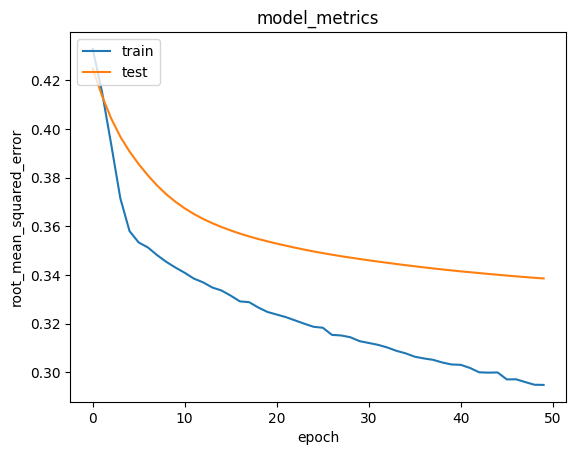

In [61]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Berdasarkan hasil visualisasi metrik evaluasi RMSE terhadap model yang dikembangkan, terlihat hasil model konvergen pada epochs sekitar 50 dan berdasarkan plot metriks model terlihat memberikan nilai MSE yang cukup kecil. Dari proses ini, diperoleh nilai error akhir sebesar 0.2953  dan error pada data validasi sebesar 0.3385. Nilai tersebut menunjukkan hasil yang cukup baik untuk sistem rekomendasi yang dihasilkan. Semakin kecil nilai RMSE, semakin baik model dalam memprediksi preferensi pengguna terhadap item. Hal inilah yang menyebabkan hasil rekomendasi dari model cukup akurat.